# Машинное обучение, DS-поток
## Домашнее задание 9

**Правила:**

* Дедлайн **08 мая 16:30**. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить на почту ` mipt.stats@yandex.ru`, указав тему письма `"[ml] Фамилия Имя - задание 9"`. Квадратные скобки обязательны. Если письмо дошло, придет ответ от автоответчика.
* Прислать нужно ноутбук и его pdf-версию (без архивов). Названия файлов должны быть такими: `9.N.ipynb` и `9.N.pdf`, где `N` - ваш номер из таблицы с оценками.
* Теоретические задачи необходимо оформить в техе/markdown или же прислать фотку в правильной ориентации рукописного решения, **где все четко видно**.
* Решения, размещенные на каких-либо интернет-ресурсах не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качествие основы, ничего не удаляя из него.
* Никакой код из данного задания при проверке запускаться не будет.

**Баллы за задание:**

* Задача 1 -- 2 балла
* Задача 2 -- 10 баллов

### Задача 1.


Докажите, что в методе k-means кластеры образуют выпуклые множества. Выполняется ли данное свойство для кластеров, определеяемых гауссовской смесью? Под кластером имеется в виду область пространства признаков.

### Задача 2.

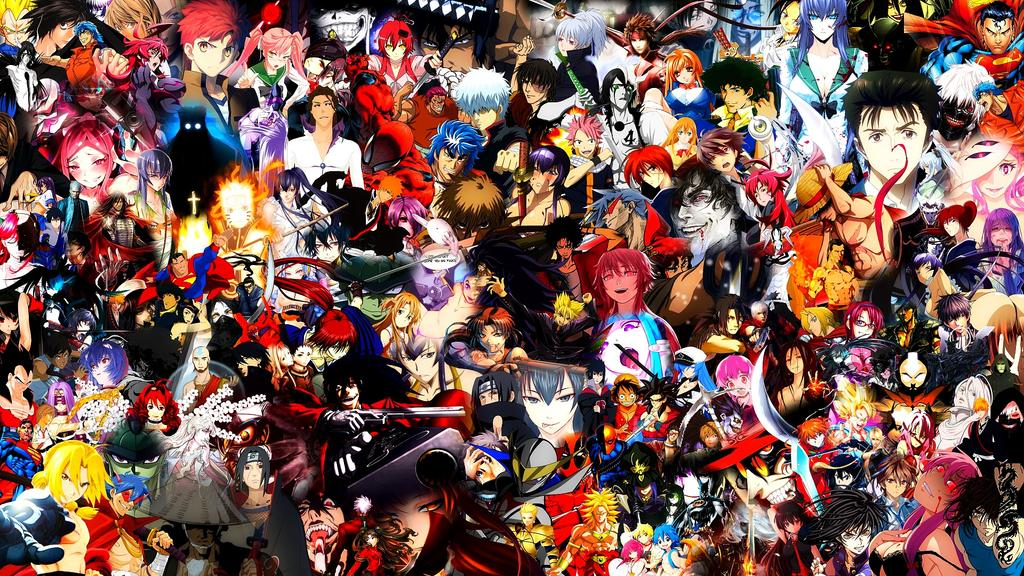

К вам пришли друзья-анимешники и попросили порекомендовать хорошее аниме. Все что им раньше советовали они уже посмотрели и теперь хотят чего-то нового. Теперь перед вами стоит задача порекомендовать друзям подходящие аниме и построить несложную рекомендательную систему. Кроме того, вы хотели бы посмотреть, какие вообще группы анимешников бывают.

Как же это сделать?...

Идея!  

Сгруппировать любителей аниме на несколько кластеров. Тогда для того, чтобы предсказать интересное аниме для пользователя, нужно сначала определить место этого пользователя в кластере, а потом на основе предпочтений остальных пользователей в этом кластере определить подходящие аниме для данного пользователя.

#### Предобработка данных

Скачайте датасет `anime.csv`. В нем вам понадобятся колонки `anime_id`, название аниме `name`, жанр `genre` и рейтинг `rating`.  Изучите основные характеристики датасета: размер, имеющиеся признаки, наличие пропусков и тому подобное. Если пропусков мало по сравнению с размером данных, то можно их удалить.

Скачайте датасет `rating.csv`. Так же изучите основые характеристики датасета.

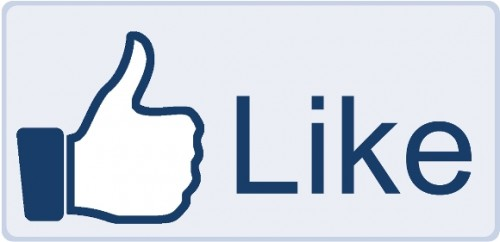

Посмотрите распредление оценок аниме у различных пользователей. Наблюдаются ли какие-то проблемы? 

Подумайте над тем, как бы сделать рейтинг более адекватным. Лучше всего сделать так, чтобы худшее аниме получило рейтинг -1, а лучшее аниме &mdash; рейтнг 1. Можно попробовать разбить оценки просто по порогам. Можно придумать что-то еще более хитрое. Не стоит много времени тратить на размышление -- подробнее с темой рекомендательных систем вы познакомитесь в следующем семестре :) Однако нужно пояснить свою методику.   

Внимание! Если в данных есть пропуски, то мы не можем сказать ничего о позитивном или негативном отношении пользователя к аниме, тогда поставьте 0 в качестве оценки. 

Обновите рейтинг в соотвествии с вашей методикой. Удалите пользователей, которые оценили не менее 30 аниме.

Объедините данные аниме и пользователей по ключу `anime_id`.

#### Кластеризация

Из таблицы с объединенными даннами, используя колонки `user_id`, `anime_id` и `rating` (персональный рейтинг аниме у пользователя), получите таблицу сопряженности, заполнив клетки этой таблицы персональным рейтингом пользователя для каждого аниме. В случае отсутствия ретинга, поставьте 0.

Выделите 5 понравившихся пользователей и вынесите их в тест. Они будут играть роль ваших друзей в задаче. Для них вы будете рекомендовать аниме.  
Для кластеризации используйте остальных пользователей. Эти данные являются трейном.

Посмотрите на таблицу сопряженности и, учитывая во внимание ее размер, подумайте информативно ли расстояние между пользователями пространстве такой размерности. 

Попробуйте различные методы понижения размерности и сделайте вложение в пространство небольшой размерности. Но учтите, что исходя из формата данных, лучше использовать косинусную метрику для оценки расстояния между точками.

*Справка. Косинусная мера*  
Пусть заданы векторы $x, y \in \mathbb{R}^d$. Известно, что их скалярное произведение и косинус угла между ними $\varphi$ связаны следующим отношением:
$$\langle x, y \rangle = \|x\|\|y\|\cos\varphi.$$
Соотвественно, косинусное расстояние определяется как
$$\rho_{cos}(x, y) = \arccos\frac{\langle x, y \rangle}{\|x\|\|y\|} = \arccos\frac{\sum_{i=1}^{d}x_iy_i}{\sqrt{\sum_{i=1}^{d}x_i}\sqrt{\sum_{i=1}^{d}y_i }}.$$  
Чем более схожи пользователи согласно тому, как они ставят оценки, тем меньше угол между их векторами, тем ближе косинус к 1. Тогда если меру использовать для оценки расстояния, нужно от 1 отнять значение меры.

Кластеризуйте полученное вложение в пространство меньшей размерности. 


В качестве метода кластеризации используйте k-means или же смесь гауссовских распределений в виде реализации `GaussianMixture` из sklearn c `covariance_type='spherical'`. Во втором случае в качестве ковариационных матриц компонент используются $\Sigma_k=diag(\sigma^2_k)$, где $k$ -- номер компоненты. Это соответствует более общему случаю k-means, при котором масштабы кластеров могут отличаться. Такое полезно при наличии кластеров разной плотности. 

Подберите оптимальное количество кластеров. Объясните свой выбор.

*Замечание.* В реальных задачах бывает полезно проводить кластеризацию даже при отстутствии какой-либо кластерной структуры в данных. Под кластером в таком случае подразумеваются группы похожих объектов, что облегчает решение многих практических задач. Метрики качества кластеризации, как правило, бесполезны в таких задачах. Однако, можете обратить внимание на <a href="https://en.wikipedia.org/wiki/Elbow_method_(clustering)">Elbow method</a>.

Проанализируйте полученные кластеры, постарайтесь их проинтерпретировать, указав жанры, которые предпочитают пользователи из данного кластера. Не забывайте про статистическую значимость ваших выводов.

#### Рекомендация друзьям

Определите к каким кластерам относятся выбранные вами пользователи.

Определите наиболее популярные аниме в данном кластере и порекомендуйте топ интерсных аниме, которые пользователи еще не смотрели.

Посмотрите на рейтинг полученных аниме вообще и рейтинг аниме в группе. Можно ли сделать какой-то вывод?

Задание*. Попробуйте порекомендовать аниме своим реальным друзьям. Как думаете, хорошая ли получилась рекомендательная система?:)